# Web Scraping em produtos em supermercados

## Problema:

Dado a falta de dados já existentes sobre vários sistemas do mercado nacional (Angola), decidi fazer um Web Scraping em sites de supermercados populares no nosso país, para pegar dados referentes aos produtos alimentares que vendem, pois dado a crise economica que vivemos, onde os preços dos produtos sobem diariamente, é bom ter informações sobre qual, e onde estão certos produtos a preço acessivel. 

O conjunto de dados pode ser depois usado para futura analise exploratoria de dados, o que não é o objecto deste notebook.

In [1]:
# importando os modulos importantes
from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime
# importando o modulo que vai nos permitir trabalhar com o path
#from lxml import etree

Já importando os modulos importantes, fazemos um request da pagina do Supermercado desejado, e pegamos o código retornado da pagina com o BeautifulSoup.

Algumas paginas, podem não vir correctamente, devido a certos scripts, para evistar isso, passamos um User-Agent quando fazemos o request da mesma. Para pegar o user Agente, vá para esse link [User Agent]("https://httpbin.org/get")

In [2]:
# Conectando com a pagina
url = 'https://www.kibabo.co.ao/pt/'

# buscando o headers
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36 Edg/115.0.1901.188"}

# pegando a pagina
page = requests.get(url=url,headers=headers)

# pegando a pagina
soup1 = BeautifulSoup(page.content,"html.parser")
# pegando a pagina de uma forma mais bonita
soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

# Imprimindo a pagina retomada!
#print(soup2)

<!DOCTYPE html>

<html lang="pt">
<head>
<title>
   Shopping para todos | Kibabo Online  O seu Supermercado Online -  Kibabo o seu Vizinho Favorito
  </title>
<meta content="Shopping para todos | Kibabo Online  O seu Supermercado Online -  Kibabo o seu Vizinho Favorito" name="title"/>
<meta content="Somos uma loja de produtos não-alimentares a preços muito competitivos, mais concretamente de utilidades para a casa, decoração, artigos de higiene e limpeza." name="description"/>
<meta content="index, follow" name="robots"/>
<meta content="date=no" name="format-detection"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="Redicom Prolepse" name="generator"/>
<meta content="general" name="rating"/>
<meta content="global" name="distribution"/>
<meta 

O Código Acima nos irá gerar o seguinte resultado: 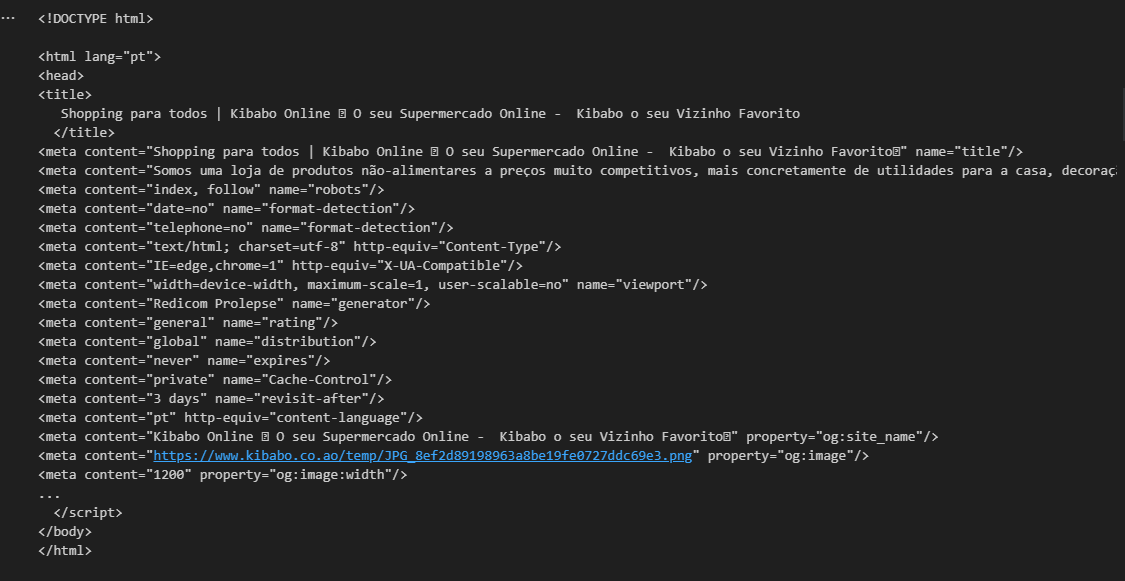
Abrindo a pagina do supermercado em questão, faço uma inspenção, clicando F12, em inspencionar pagina.
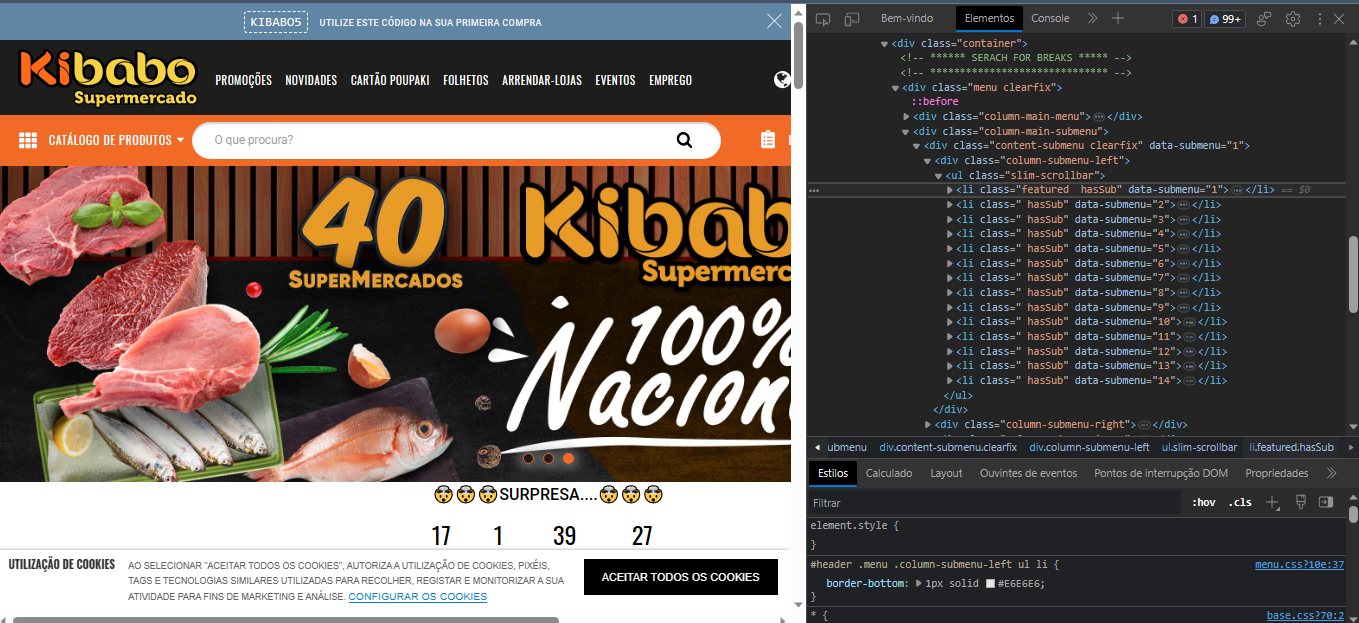

Teremos um resultado similar ao de acima na imagem, e dai pesquisando um pouco os elementos da pagina, encontramos o link que queremos, identificamos o seletores, e seus ids ou classes, então pela pagina retornada pelo BeautifulSopu, vamos encontrar todos os elementos que correspondem aos links que queremos.

In [50]:
# Pesquisamos todos item de lista que possuem uma classe de nome "hasSub"
elementos = soup2.find_all(['ul','li','a'],attrs={'class':'has-childs'})
# vamos usar o metodo len() para ver o tamanho do nosso retorno
#print(elementos[0])
len(elementos)

96

Vendo o tamanho, a pagina nos diz que temos aproximadamente 96 itens de lista, para melhor visualização, vamos dar visualizar o conteudo com um print, teremos a seguinte visualização.
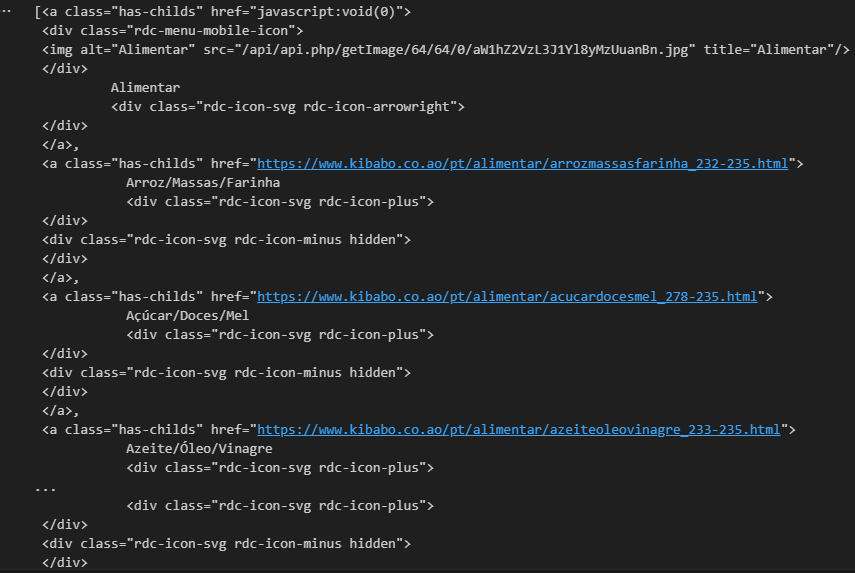
Para facilitar na lista de elementos, vamos apenas pegar os os links, como contem links quem tem apenas o texto javascrip vamos criar uma condicional para não pegar esses textos, da forma, a pegar apenas os links!

In [56]:
for elemento in elementos:
    if str(elemento.get('href')).lower().startswith('javascript'):
        continue
    elemento.get('href')

Vamos ter a seguinte saída:

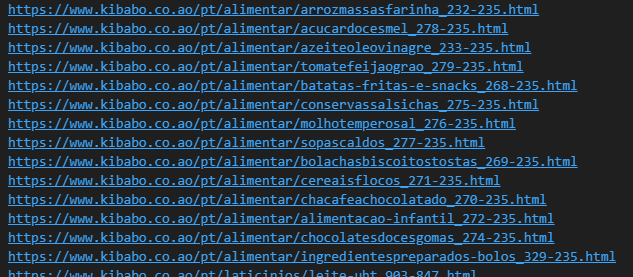

Vamos pegar os links retornados, e vamos fazer o processo similar ao que fizemos no Inicio, vamos passar um novo request, e pegar o conteudo da pagina, e pesquisar os links internos e pegar o que pretendemos.

In [57]:
#Vamos fazer algo similar a isso:
url = elementos[2].get('href')
# Como já temos um User-Agent não precisamos gerar outro!
page = requests.get(url=url,headers=headers) 

soup1 = BeautifulSoup(page.content,'html.parser')
# pegando a pagina de uma forma mais bonita
# Essa parte é desnecessaria, eu somente coloquei porque pretendia visualizar o resultado
soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

Só para Ressaltar, como o que fizemos acima, já dava para ter pego os elementos da pagina, mas como há muita possibilidade de haver produtos repetidos, então estou pegando os links dentro dos links, para não haver a possibilidade de termos produtos repetidos.

Vamos procurar por links, que inspencionando a pagina, ecnontramos...

In [64]:
elementos = soup2.findAll(['ul','li','a'],attrs={'class':'thirdLevelMenu'})
#print(elementos)

Teremos o seguinte resultado: 

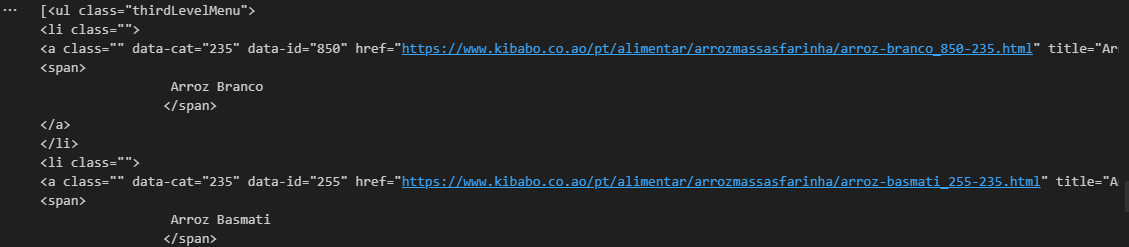

E o processo se repete, vamos pegar os link, e entrar neles, e agora será uma ultima vez, e dai podemos começar pegando os dados que pretendemos

In [68]:
for elemento in elementos[0].find_all('a'):
    if str(elemento.get('href')).lower().startswith('javascript'):
        continue
    elemento.get('href')

print(elemento.get('href'))

https://www.kibabo.co.ao/pt/alimentar/arrozmassasfarinha/espiraisoutras_856-235.html


E o processo se repete uma ultima vez.

```python
#Vamos fazer algo similar a isso:
url = elementos[2].get('href')
# Como já temos um User-Agent não precisamos gerar outro!
page = requests.get(url=url,headers=headers) 

soup1 = BeautifulSoup(page.content,'html.parser')
# pegando a pagina de uma forma mais bonita
# Essa parte é desnecessaria, eu somente coloquei porque pretendia visualizar o resultado
soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')```

In [69]:
#Vamos fazer algo similar a isso:
url = elemento.get('href')
# Como já temos um User-Agent não precisamos gerar outro!
page = requests.get(url=url,headers=headers) 

soup1 = BeautifulSoup(page.content,'html.parser')
# pegando a pagina de uma forma mais bonita
# Essa parte é desnecessaria, eu somente coloquei porque pretendia visualizar o resultado
soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

Apartir desta etapa pegamos os dados os dados referente a: 
1. Marca do produto
2. Descrição do produto
3. Tipo de Produto
4. Preço co Produto

E armazenamos estes dados em um ficheiro csv, assim temos um conjunto de dados dos produtos raspados da web.

### Pegando a Marca do produto

Lógico que essa etapa para pegar todos os produtos, devemos colocar dentro de uma estructura de repetição tambem para pegar todos os produtos, mas aqui vamos ilustrar de como pegar os mesmos sem uma estructura de repetição, e depois com uma estructura de repetição!

In [70]:
marca = soup2.find('p',attrs={'class':'key1-name'})
marca = marca.text.strip()
print(marca)

Tio Lucas


### Pegando o Tipo de Produto

In [72]:
tipo = soup2.find(id='rdc-productlist-cnt-7564')
tipo = tipo.h1.text.strip()
print(tipo)

Espirais/Outras


### Pegando o Preço do Produto

In [97]:
preco = soup2.find(['div'],attrs={'class':'dis-table-cell cell-price'}).find('p')
print(preco.get_text().strip())

295Kz


### Descrição do Produto

In [86]:
desc = soup2.find('p',attrs={'class':'name'}).text.strip()
desc

'Massa espirais tio lucas 400gr'

Para Facilitar vamos criar 1 função com recursividade para pegar os dados, e mais duas funções, uma para adicionar novos elementos ao ficheiro csv, e outra para criar o ficheiro e o seu cabeçalho.

## Criando a função para Criar um ficheiro CSV

In [108]:
# importando o modulos csv
import csv

def criar_dados(file_path,*dados):
    f"""Cria um ficheiro CSV com com o nome atribuido {dados}
    """
    dados = list(dados)
    #criando o ficheiro csv
    with open(file_path,'w',newline='',encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(dados)

## Função que Adiciona elementos novos ao ficheiro csv

In [109]:
# Importando o modulo csv
import csv

def add_csv(file_path,*dados):
    """Lembrando que ordem dos dados deve ser similar ao cabeçario dos dados"""
    dados = list(dados)
    # Adicionando novas linhas ao ficheiro csv
    with open(file_path,'+a',newline='',encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(dados)

## Criando uma função que retorna o soup do elemento

In [122]:
### Criando uma função que retorna o soup do elemento
from bs4 import BeautifulSoup
import requests

def page_soup(url, headers=None):
    """Recebe um link, e retorna uma pagina Soup dela"""
    if headers:
        request = requests.get(url=url)
        return BeautifulSoup(page.content,"html.parser")
    
    request = requests.get(url=url,headers=headers)
    return BeautifulSoup(page.content,"html.parser")

Aqui vamos executar a ultima parte do projecto, que pega o ultimo link e retorna os produtos desejados

In [140]:
def prod_return(url,headers=None):
    """Pega dados dos produtos do site do supermercado Kibabo"""
    pagina = page_soup(url,headers)
    pags = pagina.find_all('li',attrs={'class':['li-accordion', 'sel' 'initial' 'rdc-featured-li']})
    for links in pags:
        for link in links.find_all('a')[1:]:
            tipo = link.get_text().strip()
            url = link.get('href')
            page = requests.get(url=url,headers=headers)
            new_soup = BeautifulSoup(page.content,"html.parser")
            new_soup = BeautifulSoup(new_soup.prettify(), 'html.parser')
            for produto in new_soup.find_all('div',attrs={'class':'col-sm-3'}):
                marca = produto.find('p',attrs={'class':'key1-name'}).text.strip()
                descricao = produto.find('p',attrs={'class':'name'}).text.strip()
                preco = produto.find('p',attrs={'class':'current'}).text.strip().lower().replace('kz','').strip('.')
                print(marca,descricao,tipo,preco)

    # Retornando os elementos
    #return marca,descricao,tipo,preco

## Executando tudo de uma unica vez

Com tudo já feito, vamos juntar os pontos do código acima em um só, para poder pegar os dados e armazenar em um arquivo csv.

In [ ]:
import time

# vamos começar pegando os primeiros elementos 
# 1 - Vamos criar o arquivo csv
file_path = 'produtos_kibabo.csv'
criar_dados(file_path,'Marca','Descrição','Tipo','Preço')

# Pagina Inicial
url = 'https://www.kibabo.co.ao/pt/'

# Nosso User Agente
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36 Edg/115.0.1901.188"}

# pegando a pagina
soup = page_soup(url,headers)

# Vamos pesquisar pelos links dos produtos
elementos = soup.find_all(['ul','li','a'],attrs={'class':'has-childs'})

# Como pegamos uma lista, vamos passar em um ciclo de repetição para cada elemento e pegar o que precisamos pegar:
# FASE 1
for elemento in elementos:
    if str(elemento.get('href')).lower().startswith('javascript'):
        continue
    url = elemento.get('href')
    soup = page_soup(url,headers)
    novos_elementos = soup.findAll(['ul','li','a'],attrs={'class':'thirdLevelMenu'})
    #print(len(novos_elementos))
    #FASE 2
    for novo_elemento in novos_elementos:
        #print(len(novo_elemento))
        # FASE 2.5
        for novo in novo_elemento.find_all('a'):
            #print(elemento.get('href'))
            url = novo.get('href')
            print(url)
            soup_page = page_soup(url,headers)

            #FASE 3 - PEGANDO OS DADOS
            # Adicionando esses elementos no ficheiro csv
            #add_csv(file_path,marcas,descs,tipos,precos)

            time.sleep(2)


In [141]:
print(prod_return("https://www.google.com/",headers))

Tio Lucas Arroz tio lucas 1kg Arroz Branco 835
Patriota Arroz tailandia patriota 1kg Arroz Branco 840
Alimo Arroz alimo 1kg Arroz Branco 990
Kingstar Arroz paraboilizado thai kingstar 1kg Arroz Branco 1.235
Camil Arroz parabolizado camil 1kg Arroz Branco 1.435


KeyboardInterrupt: 

# FIM